In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
ROOT_DIR = "../Datasets"

ds_path = os.path.join(ROOT_DIR, "vgsales-12-4-2019-short.csv")
df = pd.read_csv(ds_path)

In [2]:
# only keep columns of interest 
df1 = df[['Genre']]
df1

,Genre
0,Sports
1,Platform
2,Racing
3,Shooter
4,Sports
...,...
55787,Role-Playing
55788,Adventure
55789,Adventure
55790,Adventure


In [3]:
df2 = df1.to_numpy()
df2 = np.ndarray.flatten(df2)
df2

array(['Sports', 'Platform', 'Racing', ..., 'Adventure', 'Adventure',
       'Action-Adventure'], dtype=object)

In [4]:
# view the number of each genre
view_counted = {}

for i in df2:
    if i not in view_counted: view_counted[i] = 1
    else: view_counted[i] += 1
view_counted = dict(sorted(view_counted.items(), key=lambda kv: kv[1], reverse=True))
print(view_counted)


{'Misc': 9476, 'Action': 7667, 'Adventure': 5293, 'Sports': 5244, 'Shooter': 4586, 'Role-Playing': 4551, 'Platform': 3445, 'Strategy': 3266, 'Puzzle': 3162, 'Racing': 3030, 'Simulation': 2737, 'Fighting': 2085, 'Action-Adventure': 609, 'Visual Novel': 260, 'Music': 195, 'Party': 75, 'MMO': 74, 'Board Game': 16, 'Education': 12, 'Sandbox': 9}


In [5]:
# count the number of each genre, removing less than 1 percent values, or less than 500 raw values
counted = {'Misc': 0}
add_to_misc = ['Sandbox','Education','Board Game','MMO','Party','Music','Visual Novel']

for i in df2:
    if i in add_to_misc: counted['Misc'] += 1
    elif i not in counted: counted[i] = 1
    else: counted[i] += 1
counted = sorted(counted.items(), key=lambda kv: kv[1], reverse=True)
counted = dict(counted)
print(counted)



{'Misc': 10117, 'Action': 7667, 'Adventure': 5293, 'Sports': 5244, 'Shooter': 4586, 'Role-Playing': 4551, 'Platform': 3445, 'Strategy': 3266, 'Puzzle': 3162, 'Racing': 3030, 'Simulation': 2737, 'Fighting': 2085, 'Action-Adventure': 609}


In [6]:
name = []
data = []

# count genres total
tot = 0.0
for k in counted:
    tot += counted[k]
print(tot)

for k in counted:
    percent = counted[k]*100/float(tot)
    s = "%s: %0.2f%%" % (k, percent)
    print(s)
    name.append(s)
    data.append(counted[k])

55792.0
Misc: 18.13%
Action: 13.74%
Adventure: 9.49%
Sports: 9.40%
Shooter: 8.22%
Role-Playing: 8.16%
Platform: 6.17%
Strategy: 5.85%
Puzzle: 5.67%
Racing: 5.43%
Simulation: 4.91%
Fighting: 3.74%
Action-Adventure: 1.09%


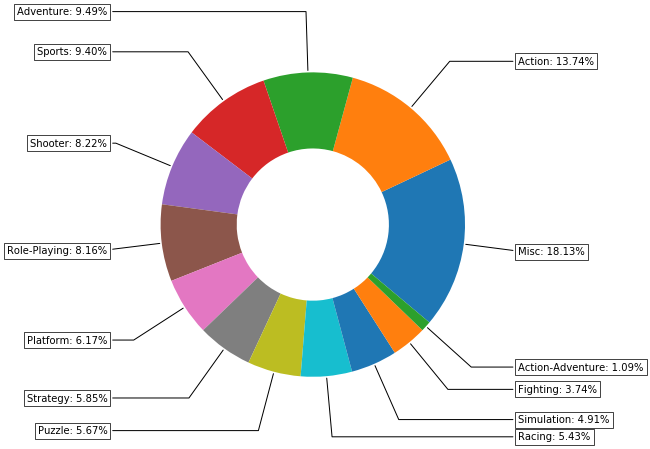

In [7]:
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(name[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.show()